In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Data Exploration

In [2]:
#Total Folder: group-data-by-boro
group_data = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/group-data-by-boro.csv")

In [3]:
group_data.head()

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,215441.0,30006.0,8098.0,8415.98,1172.15,316.34,143450.0,21903.0,...,8182.0,9558.63,1354.52,363.02,58186.0,5504.0,1530.0,12220.28,1155.96,321.33
1,Age,0-4,5224.0,233.0,NaN,2855.80,127.37,NaN,3290.0,170.0,...,NaN,3186.84,107.22,NaN,1327.0,32.0,NaN,4851.21,116.98,NaN
2,Age,5-12,11478.0,142.0,NaN,4555.21,56.35,NaN,7273.0,95.0,...,NaN,4857.63,41.85,NaN,3177.0,15.0,NaN,6943.51,32.78,NaN
3,Age,13-17,8567.0,150.0,NaN,6112.22,107.02,NaN,5317.0,121.0,...,NaN,6457.76,100.18,NaN,2879.0,28.0,NaN,9639.72,93.75,NaN
4,Age,0-17,NaN,NaN,8.0,NaN,NaN,1.39,NaN,NaN,...,5.0,NaN,NaN,1.12,NaN,NaN,2.0,NaN,NaN,1.94


Checking which columns have missing values and what rows I will keep

In [4]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  18 non-null     object 
 1   subgroup               18 non-null     object 
 2   BK_CASE_COUNT          17 non-null     float64
 3   BK_HOSPITALIZED_COUNT  17 non-null     float64
 4   BK_DEATH_COUNT         15 non-null     float64
 5   BK_CASE_RATE           17 non-null     float64
 6   BK_HOSPITALIZED_RATE   17 non-null     float64
 7   BK_DEATH_RATE          15 non-null     float64
 8   BX_CASE_COUNT          17 non-null     float64
 9   BX_HOSPITALIZED_COUNT  17 non-null     float64
 10  BX_DEATH_COUNT         15 non-null     float64
 11  BX_CASE_RATE           17 non-null     float64
 12  BX_HOSPITALIZED_RATE   17 non-null     float64
 13  BX_DEATH_RATE          15 non-null     float64
 14  MN_CASE_COUNT          17 non-null     float64
 15  MN_HOSPI

### Filling in missing values and creating new columns

I intent to keep the category 0-17 but since it has a lot of missing values, I will find them in by adding the rows above. For example: For 'BK_CASE_COUNT' 0-17 na row, I will add rows: 0-4,5-12 and 13-17. 

In [5]:
group_data = group_data.fillna((group_data[group_data['group']=='Age'][:3].sum()))

In [6]:
group_data.head()

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,215441.0,30006.0,8098.0,8415.98,1172.15,316.34,143450.0,21903.0,...,8182.0,9558.63,1354.52,363.02,58186.0,5504.0,1530.0,12220.28,1155.96,321.33
1,Age,0-4,5224.0,233.0,0.0,2855.80,127.37,0.00,3290.0,170.0,...,0.0,3186.84,107.22,0.00,1327.0,32.0,0.0,4851.21,116.98,0.00
2,Age,5-12,11478.0,142.0,0.0,4555.21,56.35,0.00,7273.0,95.0,...,0.0,4857.63,41.85,0.00,3177.0,15.0,0.0,6943.51,32.78,0.00
3,Age,13-17,8567.0,150.0,0.0,6112.22,107.02,0.00,5317.0,121.0,...,0.0,6457.76,100.18,0.00,2879.0,28.0,0.0,9639.72,93.75,0.00
4,Age,0-17,25269.0,525.0,8.0,13523.23,290.74,1.39,15880.0,386.0,...,5.0,14502.23,249.25,1.12,7383.0,75.0,2.0,21434.44,243.51,1.94


Now that the row 0-17 is full, I will drop the repeated categories(0-4,5-12 and 13-17) as well as the columns I won't be using

In [7]:
group_data.drop([1,2,3],inplace=True)

In [8]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  15 non-null     object 
 1   subgroup               15 non-null     object 
 2   BK_CASE_COUNT          15 non-null     float64
 3   BK_HOSPITALIZED_COUNT  15 non-null     float64
 4   BK_DEATH_COUNT         15 non-null     float64
 5   BK_CASE_RATE           15 non-null     float64
 6   BK_HOSPITALIZED_RATE   15 non-null     float64
 7   BK_DEATH_RATE          15 non-null     float64
 8   BX_CASE_COUNT          15 non-null     float64
 9   BX_HOSPITALIZED_COUNT  15 non-null     float64
 10  BX_DEATH_COUNT         15 non-null     float64
 11  BX_CASE_RATE           15 non-null     float64
 12  BX_HOSPITALIZED_RATE   15 non-null     float64
 13  BX_DEATH_RATE          15 non-null     float64
 14  MN_CASE_COUNT          15 non-null     float64
 15  MN_HOSPI

In [9]:
for col in group_data.columns:
    if "RATE" in col or "HOSPITALIZED_COUNT" in col:
        group_data = group_data.drop(col, axis=1)

In [10]:
group_data = group_data[group_data['group']=='Age']

In [11]:
group_data

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
4,Age,0-17,25269.0,8.0,15880.0,6.0,8815.0,2.0,21299.0,5.0,7383.0,2.0
5,Age,18-24,19594.0,19.0,12900.0,8.0,10877.0,3.0,18274.0,7.0,6284.0,5.0
6,Age,25-34,40373.0,73.0,25295.0,61.0,23009.0,21.0,38156.0,71.0,9965.0,12.0
7,Age,35-44,33458.0,168.0,22324.0,158.0,15180.0,60.0,35322.0,229.0,8888.0,33.0
8,Age,45-54,29855.0,502.0,22828.0,383.0,13471.0,151.0,35380.0,524.0,9191.0,90.0
9,Age,55-64,29659.0,1170.0,21727.0,937.0,13367.0,397.0,33291.0,1370.0,8457.0,182.0
10,Age,65-74,20666.0,2018.0,12647.0,1381.0,9029.0,785.0,19073.0,2022.0,4551.0,359.0
11,Age,75+,16372.0,4140.0,9645.0,2448.0,8961.0,2164.0,14508.0,3954.0,3450.0,847.0


In [12]:
group_data["BK_FATALITY_RATE"] =  group_data["BK_DEATH_COUNT"]/group_data["BK_CASE_COUNT"]

In [13]:
group_data["BX_FATALITY_RATE"] =  group_data["BX_DEATH_COUNT"]/group_data["BX_CASE_COUNT"]

In [14]:
group_data["MN_FATALITY_RATE"] =  group_data["MN_DEATH_COUNT"]/group_data["MN_CASE_COUNT"]

In [15]:
group_data["QN_FATALITY_RATE"] =  group_data["QN_DEATH_COUNT"]/group_data["QN_CASE_COUNT"]

In [16]:
group_data["SI_FATALITY_RATE"] =  group_data["SI_DEATH_COUNT"]/group_data["SI_CASE_COUNT"]

In [17]:
group_data

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,Age,0-17,25269.0,8.0,15880.0,6.0,8815.0,2.0,21299.0,5.0,7383.0,2.0,0.000317,0.000378,0.000227,0.000235,0.000271
5,Age,18-24,19594.0,19.0,12900.0,8.0,10877.0,3.0,18274.0,7.0,6284.0,5.0,0.000970,0.000620,0.000276,0.000383,0.000796
6,Age,25-34,40373.0,73.0,25295.0,61.0,23009.0,21.0,38156.0,71.0,9965.0,12.0,0.001808,0.002412,0.000913,0.001861,0.001204
7,Age,35-44,33458.0,168.0,22324.0,158.0,15180.0,60.0,35322.0,229.0,8888.0,33.0,0.005021,0.007078,0.003953,0.006483,0.003713
8,Age,45-54,29855.0,502.0,22828.0,383.0,13471.0,151.0,35380.0,524.0,9191.0,90.0,0.016815,0.016778,0.011209,0.014811,0.009792
9,Age,55-64,29659.0,1170.0,21727.0,937.0,13367.0,397.0,33291.0,1370.0,8457.0,182.0,0.039448,0.043126,0.029700,0.041152,0.021521
10,Age,65-74,20666.0,2018.0,12647.0,1381.0,9029.0,785.0,19073.0,2022.0,4551.0,359.0,0.097648,0.109196,0.086942,0.106014,0.078884
11,Age,75+,16372.0,4140.0,9645.0,2448.0,8961.0,2164.0,14508.0,3954.0,3450.0,847.0,0.252871,0.253810,0.241491,0.272539,0.245507


### Graphing
#### Now that I have all the data I will need for Diagram #2 (The infection: # of cases for each borough and the fatality rate for each borough. I will start plotting. 

In [18]:
x = group_data["subgroup"]

In [19]:
y1 = group_data.iloc[:,2:12:2]
y2 = group_data.iloc[:, 12:]

In [20]:
y1

,BK_CASE_COUNT,BX_CASE_COUNT,MN_CASE_COUNT,QN_CASE_COUNT,SI_CASE_COUNT
4,25269.0,15880.0,8815.0,21299.0,7383.0
5,19594.0,12900.0,10877.0,18274.0,6284.0
6,40373.0,25295.0,23009.0,38156.0,9965.0
7,33458.0,22324.0,15180.0,35322.0,8888.0
8,29855.0,22828.0,13471.0,35380.0,9191.0
9,29659.0,21727.0,13367.0,33291.0,8457.0
10,20666.0,12647.0,9029.0,19073.0,4551.0
11,16372.0,9645.0,8961.0,14508.0,3450.0


In [21]:
y2

,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0.000317,0.000378,0.000227,0.000235,0.000271
5,0.000970,0.000620,0.000276,0.000383,0.000796
6,0.001808,0.002412,0.000913,0.001861,0.001204
7,0.005021,0.007078,0.003953,0.006483,0.003713
8,0.016815,0.016778,0.011209,0.014811,0.009792
9,0.039448,0.043126,0.029700,0.041152,0.021521
10,0.097648,0.109196,0.086942,0.106014,0.078884
11,0.252871,0.253810,0.241491,0.272539,0.245507


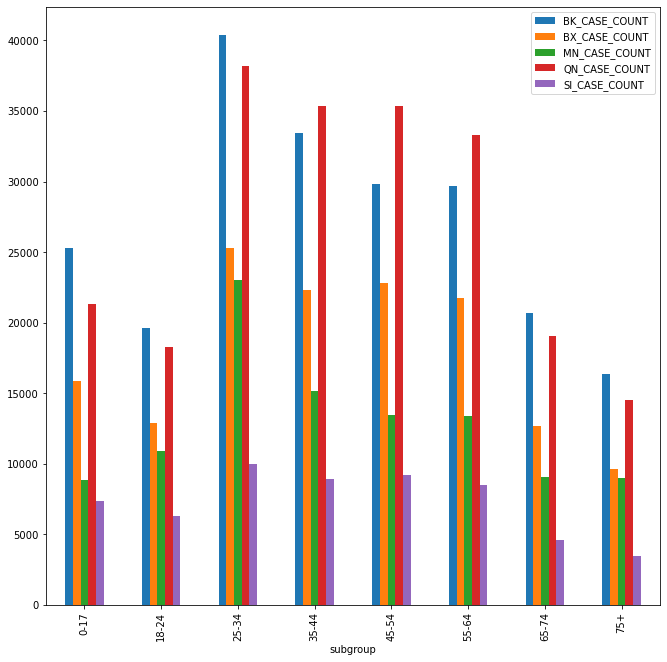

In [22]:
group_data.groupby('subgroup')[['BK_CASE_COUNT','BX_CASE_COUNT','MN_CASE_COUNT','QN_CASE_COUNT','SI_CASE_COUNT']].sum().plot(kind='bar', figsize= (11,11))

In [23]:
borough_fatality = 'BK_FATALITY_RATE'

In [24]:
group_data[["subgroup","BK_CASE_COUNT", "BK_FATALITY_RATE" ]]

,subgroup,BK_CASE_COUNT,BK_FATALITY_RATE
4,0-17,25269.0,0.000317
5,18-24,19594.0,0.000970
6,25-34,40373.0,0.001808
7,35-44,33458.0,0.005021
8,45-54,29855.0,0.016815
9,55-64,29659.0,0.039448
10,65-74,20666.0,0.097648
11,75+,16372.0,0.252871


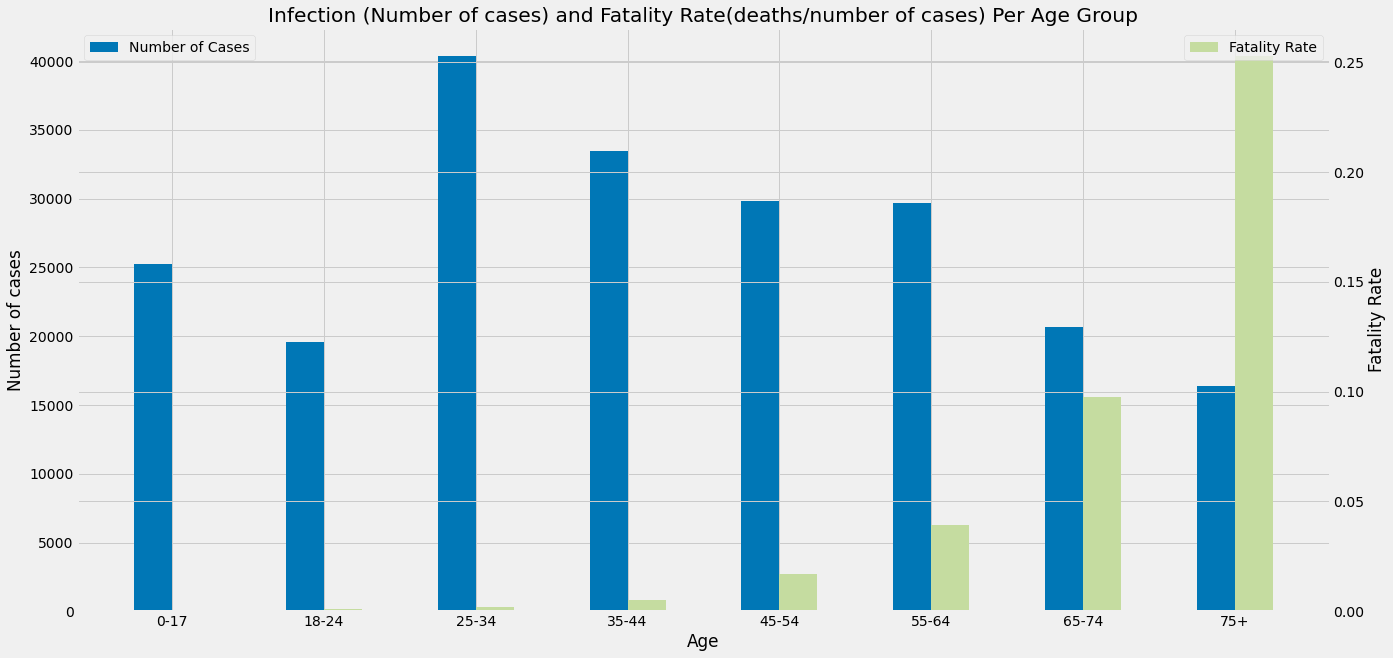

In [30]:
%matplotlib inline

borough_filter = 'BK_CASE_COUNT'
borough_fatality_filter = 'BK_FATALITY_RATE'

width = 0.25
labels = ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
data1 = group_data.groupby('subgroup')[borough_filter].sum()
data2 = group_data.groupby('subgroup')[borough_fatality_filter].sum()
x = np.arange(len(labels))

plt.style.use('fivethirtyeight')
fig, ax1= plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.bar(x-width/2, data1, width=width,label='Number of Cases', color='#0077B6')
ax2.bar(x+width/2, data2,width=width,label='Fatality Rate',color= '#C5DCA0')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of cases')
ax2.set_ylabel('Fatality Rate')
ax1.set_title('Infection (Number of cases) and Fatality Rate(deaths/number of cases) Per Age Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#make bars negative to push 0 higher
# removed grid

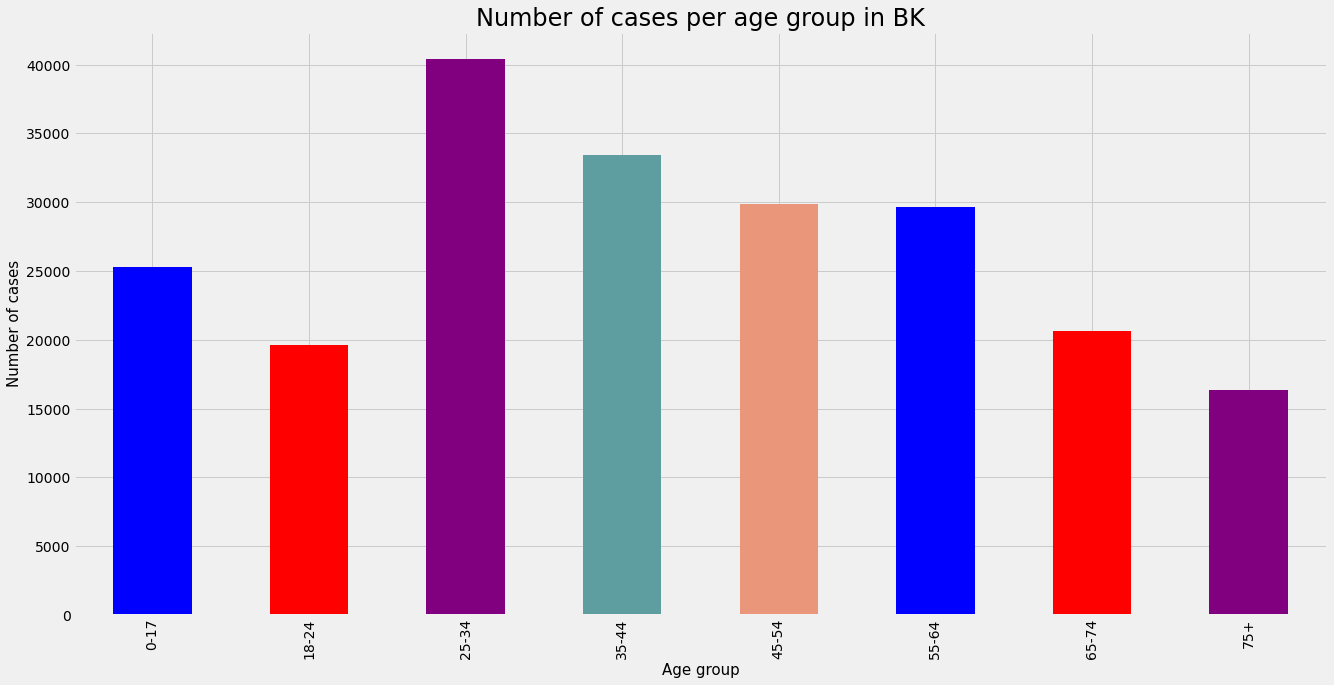

In [28]:
from matplotlib import style

plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("blue", "red", "purple",'cadetblue','darksalmon')
group_data.groupby('subgroup')[borough_filter].sum().plot(kind='bar',color=color)
ax.set_title(f'Number of cases per age group in {borough_filter[:2]}',size=24)
ax.set_xlabel('Age group',size=15)
ax.set_ylabel('Number of cases', size=15)
plt.show()

In [ ]:
#Trends Folder: data by day
data_day =pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv")

In [ ]:
data_day

In [ ]:
data_day.info()

In [ ]:
#Totals Folder: by_boro
totals_boro = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/by-boro.csv")

In [ ]:
totals_boro